In [5]:
import pandas as pd
import seaborn as sns
import numpy as np 

In [6]:
data = pd.read_csv(r"C:/Users/gbisnik/datascience/project3/admitpredict/data/Admission_Predict.csv")

In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


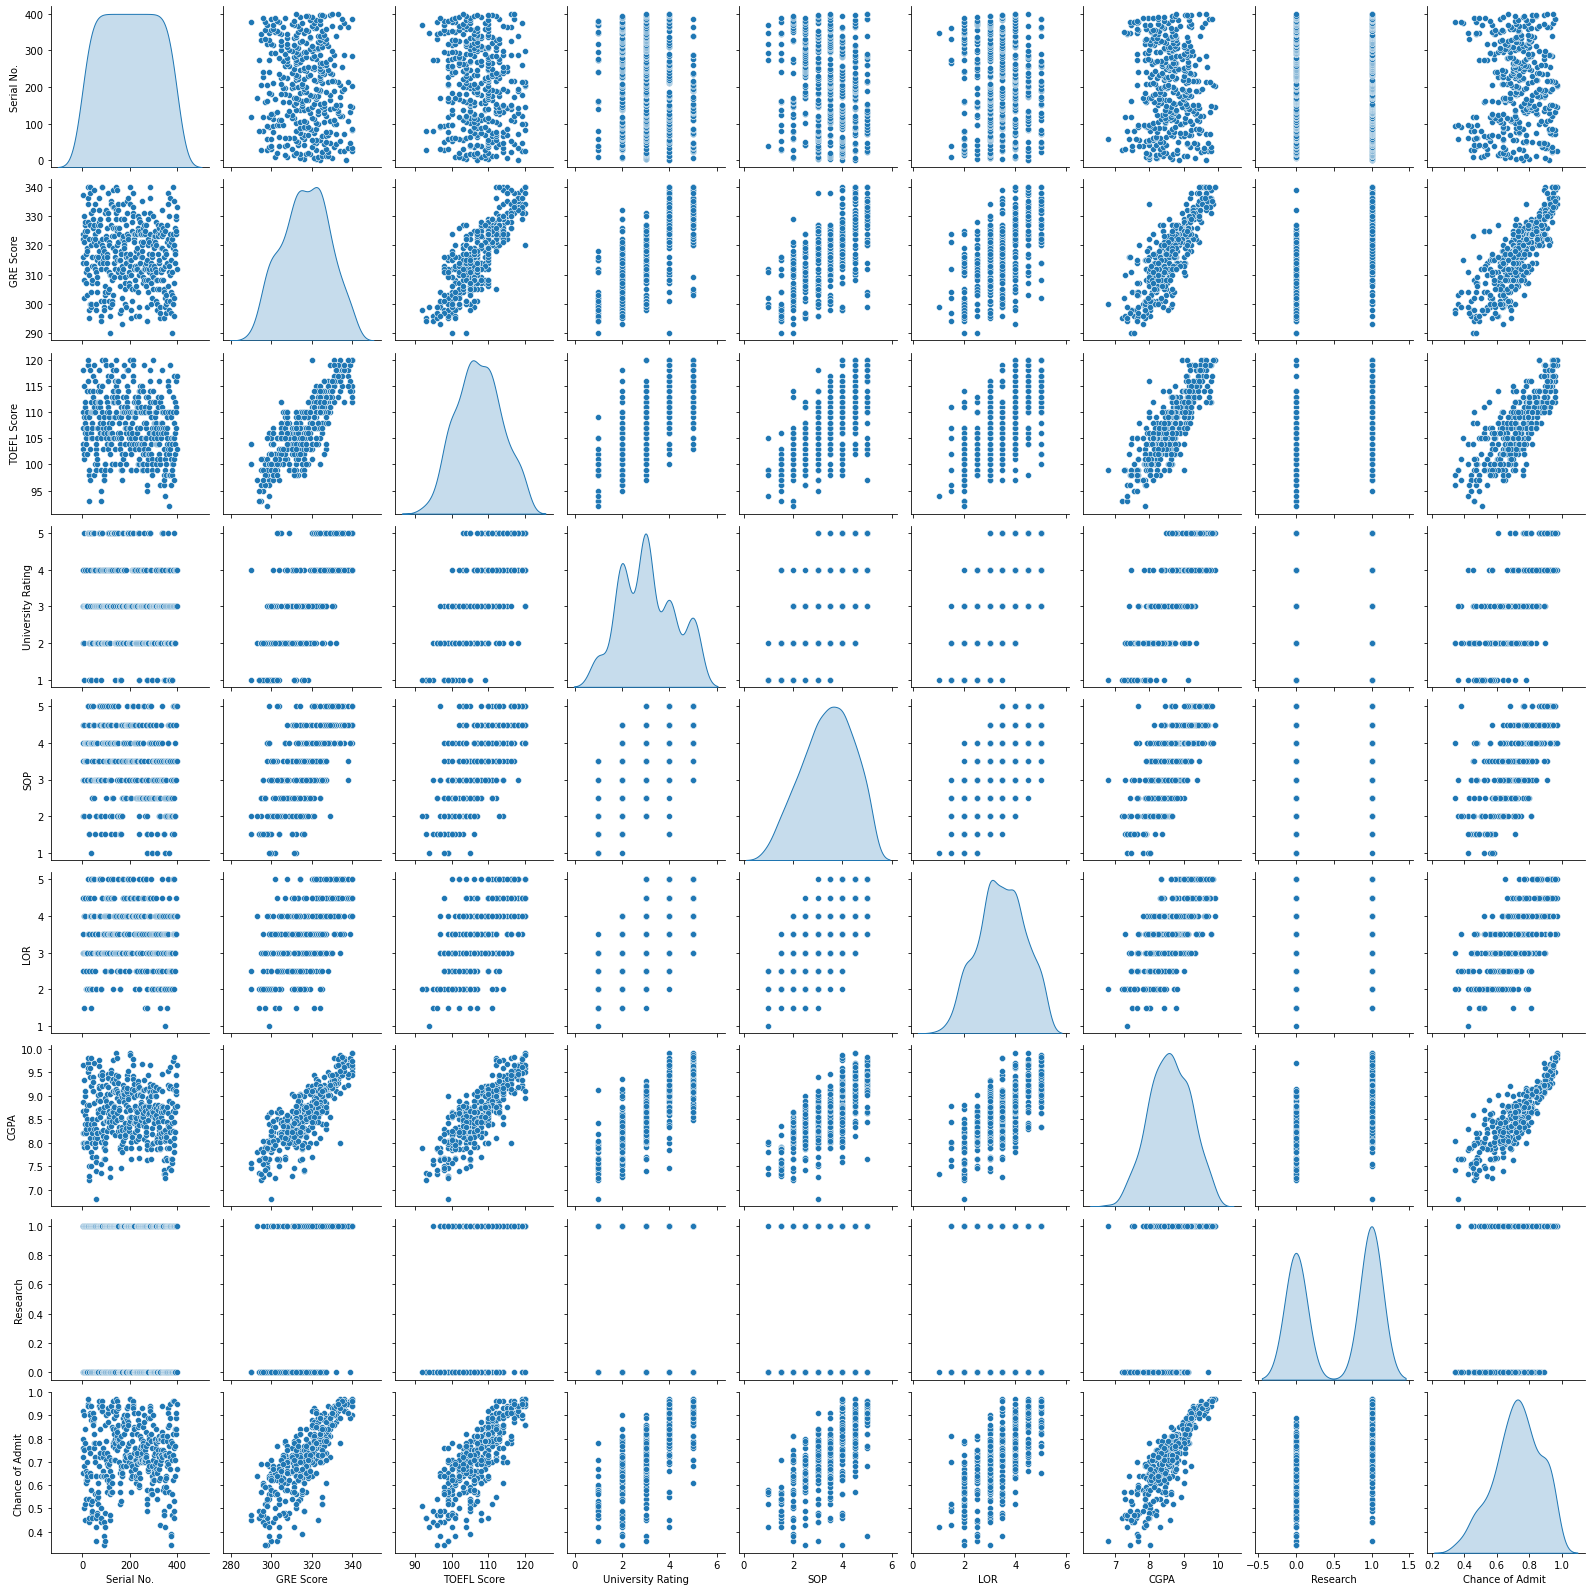

In [8]:
sns.pairplot(data,diag_kind ='kde')

In [11]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<AxesSubplot:>

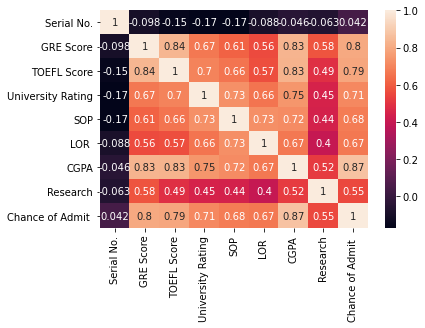

In [12]:
sns.heatmap(data.corr(),annot=True)

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [16]:
x =data[["GRE Score","TOEFL Score","University Rating","CGPA"]]
y = data[["Chance of Admit "]]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=1)

In [18]:
y_train

,Chance of Admit
39,0.48
167,0.64
383,0.62
221,0.75
351,0.73
...,...
255,0.79
72,0.93
396,0.84
235,0.88


In [22]:
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [24]:
#predictions = regressor.predict(x_test)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)
predictions = regressor.predict(x_test)

0.8044295325063245
0.047176415012424124
0.8059518687858243


C:\Users\gbisnik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


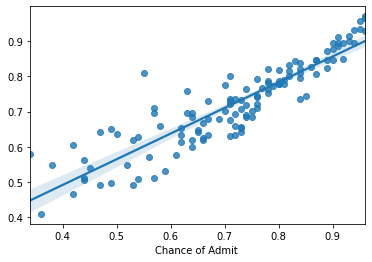

In [25]:
print(r2_score(y_test,predictions))
print(mean_absolute_error(y_test,predictions))
print(explained_variance_score(y_test,predictions))
rp = sns.regplot(y_test,predictions)

In [26]:
regressor.score(x_train,y_train),regressor.score(x_test,y_test)

(0.7778015456846101, 0.8044295325063245)

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
ypred=lr.predict(x_test)

In [28]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.7778015456846101, 0.8044295325063245)

In [29]:
import pickle 
pickle.dump(lr,open('linear.pkl','wb'))